In [1]:
from faker import Faker
import random
import pandas as pd
import numpy as np

fake = Faker()

# Generate finance data
def generate_finance_data(num_records):
    data = []
    for _ in range(num_records):
        date = fake.date_between(start_date='-1y', end_date='today')
        company = fake.company()
        revenue = random.randint(50000, 200000)
        expenses = revenue * random.uniform(0.4, 0.8)
        profit = revenue - expenses if expenses < revenue else 0

        data.append((date, company, revenue, expenses, profit))

    # Introduce null values, outliers, and duplicates
    for _ in range(num_records // 10):
        row_index = random.randint(0, num_records - 1)
        data[row_index] = list(data[row_index])
        # Introduce null values
        data[row_index][3] = None
        # Introduce outliers
        data[row_index][2] *= random.uniform(1.5, 2)
        # Introduce duplicates
        data.append(data[row_index])

    return data

# Generate finance data
finance_data = generate_finance_data(1000)

# Create DataFrame
df = pd.DataFrame(finance_data, columns=['Date', 'Company', 'Revenue(USD)', 'Expenses(USD)', 'Profit(USD)'])

# Shuffle DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Display DataFrame
print(df.head(10))


         Date                      Company   Revenue(USD)  Expenses(USD)  \
0  2024-03-13                Dillon-Santos  126566.000000   89900.312988   
1  2023-06-05  Morris, Thomas and Ferguson   60356.000000   45412.863991   
2  2024-04-23       Lopez, Davis and Perez  253264.332770            NaN   
3  2023-07-25   Saunders, Ramos and Stokes  110941.000000   45594.092289   
4  2023-06-03                  Hubbard Ltd  128901.815027            NaN   
5  2024-01-14                    Smith Inc  195960.000000   95957.321264   
6  2024-02-04                  Herrera PLC  115034.000000   75255.668757   
7  2023-06-18  Schultz, Andrews and Chavez   94382.000000   67757.134014   
8  2023-05-29        James, Burch and Diaz  147697.000000   81267.959107   
9  2023-07-19      Daniels, Hogan and Webb  147583.000000   62249.953404   

     Profit(USD)  
0   36665.687012  
1   14943.136009  
2   74176.435766  
3   65346.907711  
4   38610.893820  
5  100002.678736  
6   39778.331243  
7   26624.8

In [15]:
# Check for null values
null_values = df.isnull().sum()
print("Null Values:\n", null_values)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)


Null Values:
 Date             0
Company          0
Revenue(USD)     0
Expenses(USD)    0
Profit(USD)      0
Profit Margin    0
dtype: int64

Duplicate Rows:
 Empty DataFrame
Columns: [Date, Company, Revenue(USD), Expenses(USD), Profit(USD), Profit Margin]
Index: []


In [16]:
# Remove null values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Display cleaned DataFrame
print(df.head())


         Date                      Company  Revenue(USD)  Expenses(USD)  \
0  2024-03-13                Dillon-Santos      126566.0   89900.312988   
1  2023-06-05  Morris, Thomas and Ferguson       60356.0   45412.863991   
2  2023-07-25   Saunders, Ramos and Stokes      110941.0   45594.092289   
3  2024-01-14                    Smith Inc      195960.0   95957.321264   
4  2024-02-04                  Herrera PLC      115034.0   75255.668757   

     Profit(USD)  Profit Margin  
0   36665.687012      28.969618  
1   14943.136009      24.758327  
2   65346.907711      58.902397  
3  100002.678736      51.032190  
4   39778.331243      34.579630  


In [17]:
# Calculate the first and third quartiles for 'Revenue(USD)'
Q1 = df['Revenue(USD)'].quantile(0.25)
Q3 = df['Revenue(USD)'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'Revenue(USD)'
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers in 'Revenue(USD)'
outliers_revenue = df[(df['Revenue(USD)'] < lower_bound) | (df['Revenue(USD)'] > upper_bound)]

# Output the outliers
print("Outliers in Revenue(USD):")
print(outliers_revenue)


Outliers in Revenue(USD):
Empty DataFrame
Columns: [Date, Company, Revenue(USD), Expenses(USD), Profit(USD), Profit Margin]
Index: []


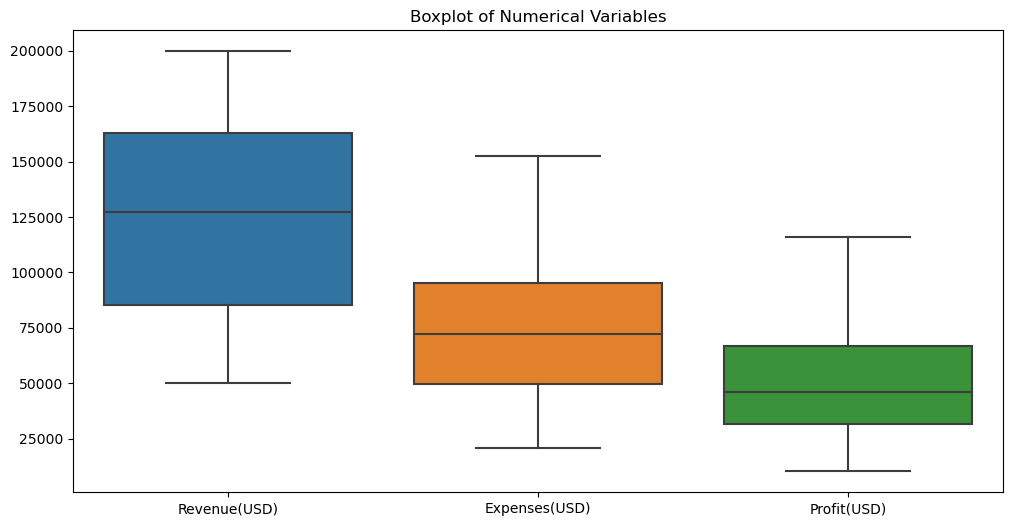

In [6]:
# Visualize outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['Date', 'Company']))
plt.title('Boxplot of Numerical Variables')
plt.show()


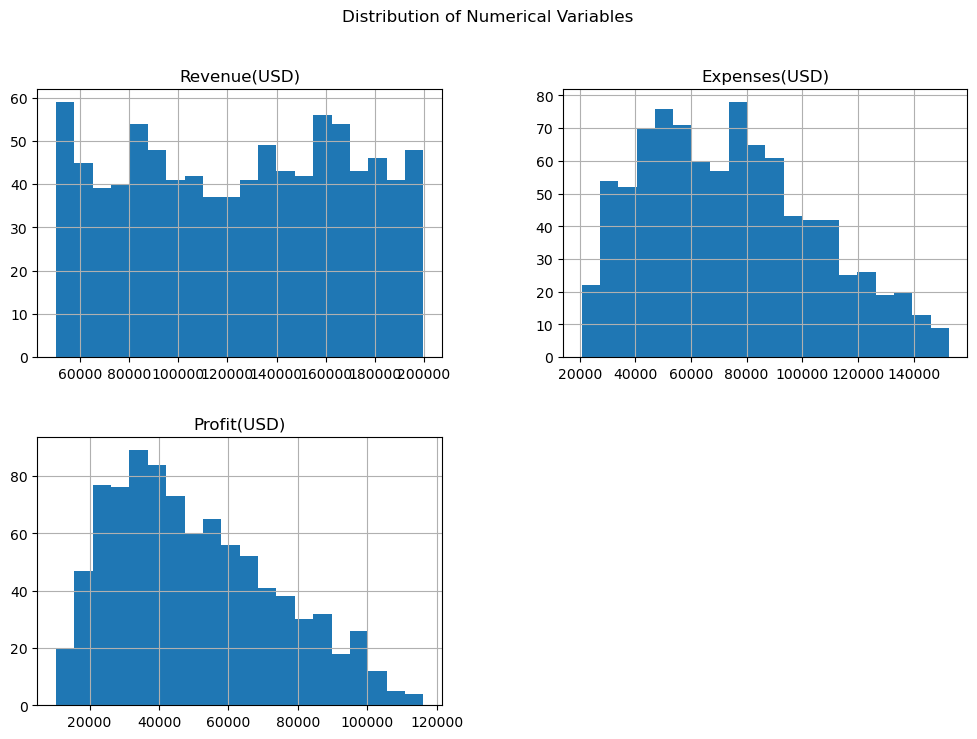

In [7]:
# Visualize distributions using histograms
df.drop(columns=['Date', 'Company']).hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Numerical Variables')
plt.show()


In [8]:
# Calculate profit margin
df['Profit Margin'] = (df['Profit(USD)'] / df['Revenue(USD)']) * 100


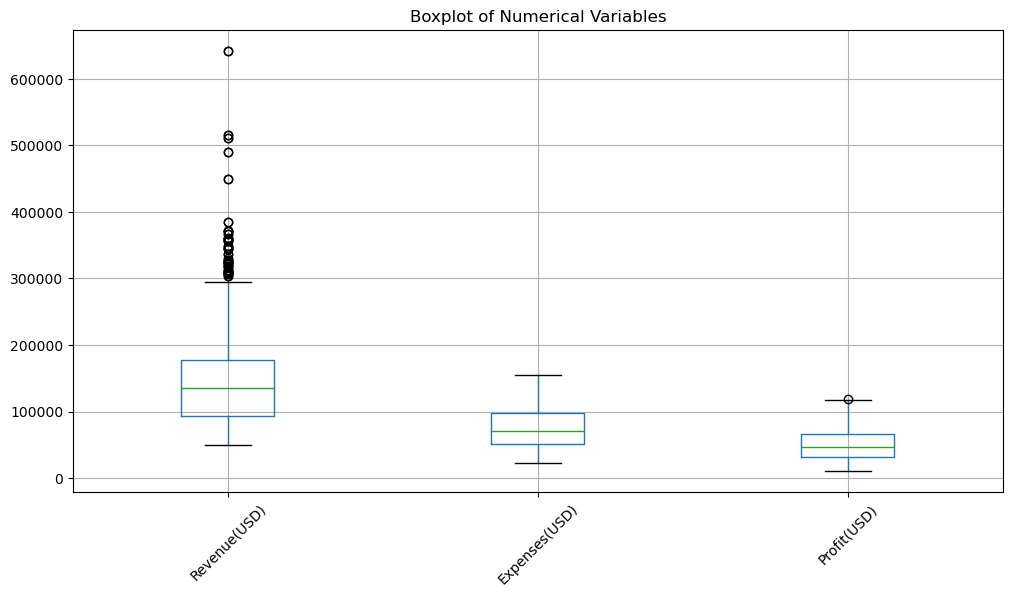

In [10]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
df.drop(columns=['Date', 'Company']).boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()


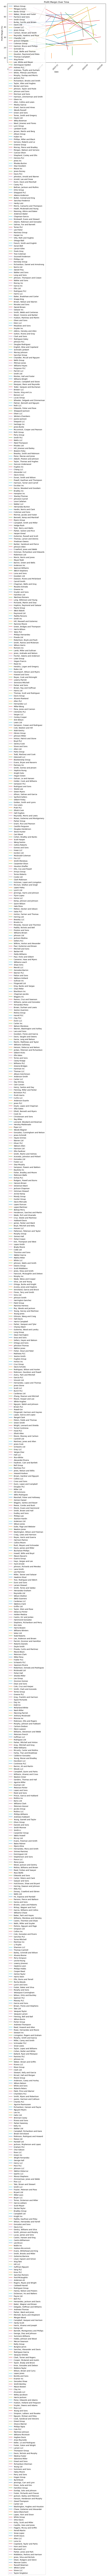

In [12]:
# Calculate profit margin
df['Profit Margin'] = (df['Profit(USD)'] / df['Revenue(USD)']) * 100

# Visualize profit margin over time for each company
plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    data = df[df['Company'] == company]
    plt.plot(data['Date'], data['Profit Margin'], label=company)

plt.title('Profit Margin Over Time')
plt.xlabel('Date')
plt.ylabel('Profit Margin (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


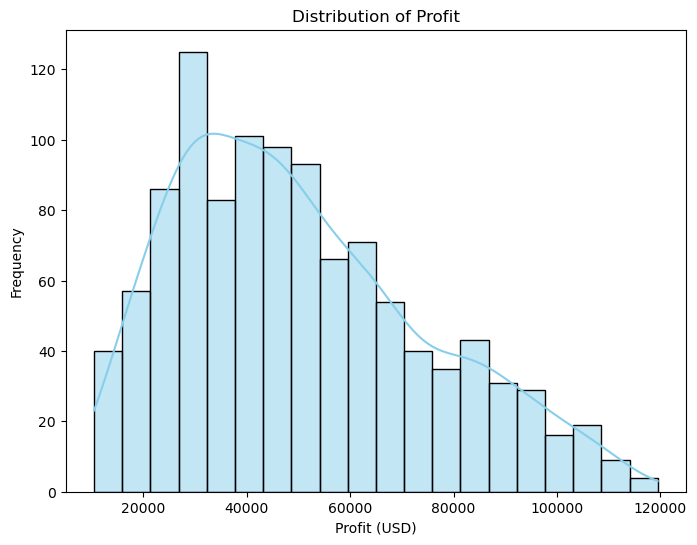

In [17]:
# Visualize distribution of profit
plt.figure(figsize=(8, 6))
sns.histplot(df['Profit(USD)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Profit')
plt.xlabel('Profit (USD)')
plt.ylabel('Frequency')
plt.show()


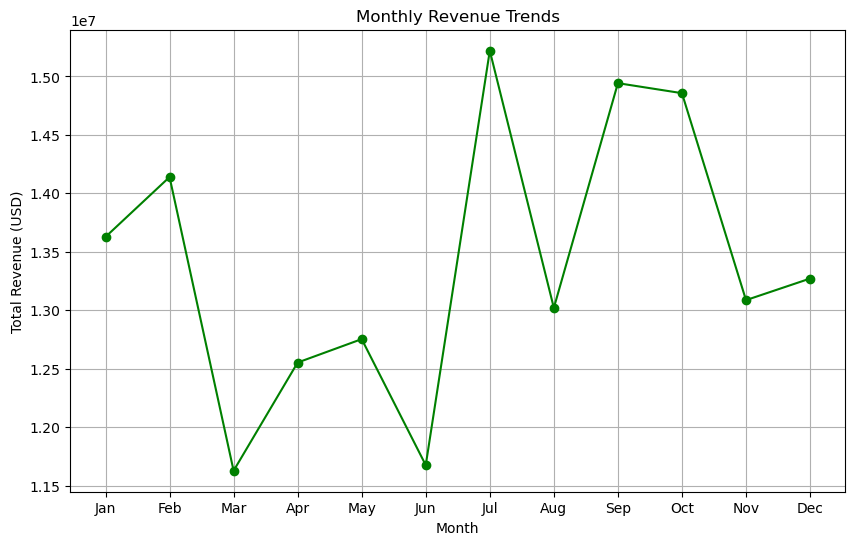

In [18]:
# Extract month from date
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Calculate total revenue for each month
monthly_revenue = df.groupby('Month')['Revenue(USD)'].sum()

# Visualize monthly revenue trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='green')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


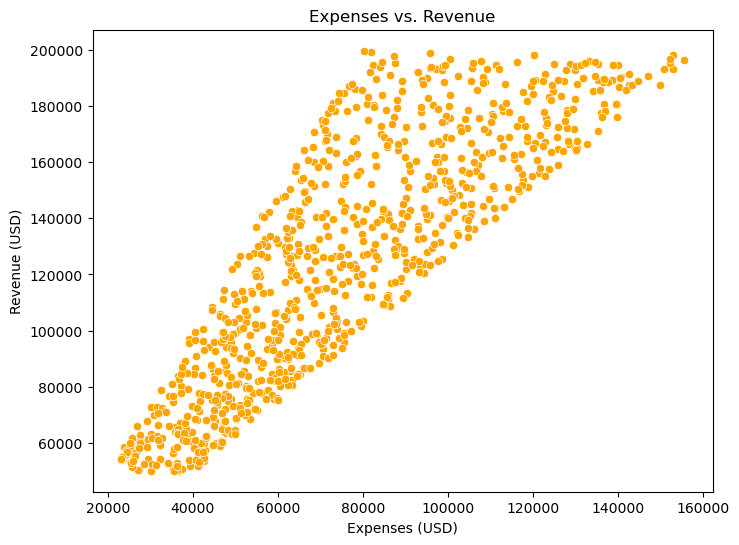

In [19]:
# Visualize expenses vs. revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Expenses(USD)', y='Revenue(USD)', data=df, color='orange')
plt.title('Expenses vs. Revenue')
plt.xlabel('Expenses (USD)')
plt.ylabel('Revenue (USD)')
plt.show()


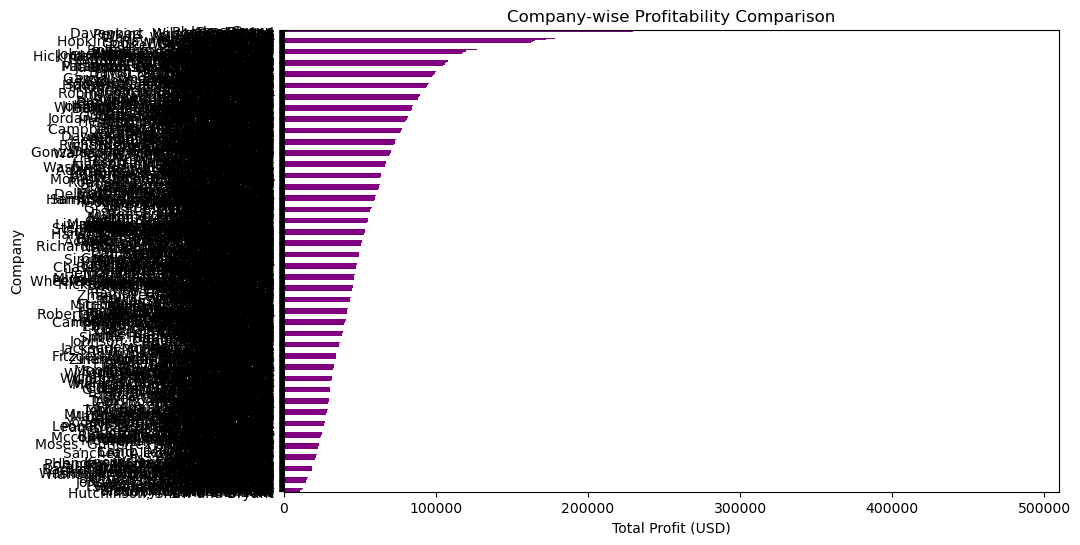

In [21]:
# Calculate total profit for each company
total_profit_by_company = df.groupby('Company')['Profit(USD)'].sum()

# Visualize company-wise profitability comparison
plt.figure(figsize=(10, 6))
total_profit_by_company.sort_values().plot(kind='barh', color='purple')
plt.title('Company-wise Profitability Comparison')
plt.xlabel('Total Profit (USD)')
plt.ylabel('Company')
plt.show()


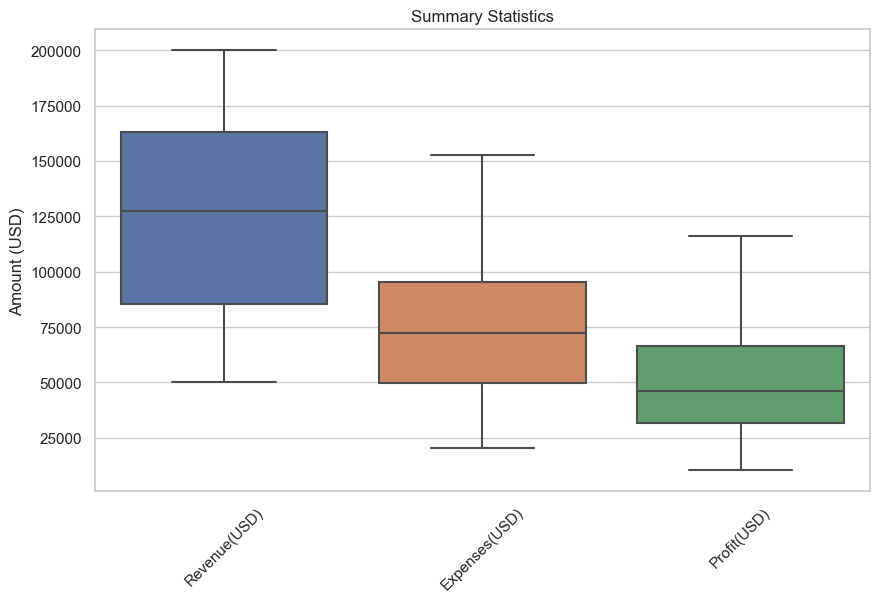

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 1. Summary statistics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Revenue(USD)', 'Expenses(USD)', 'Profit(USD)']])
plt.title('Summary Statistics')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.show()